# 3 Use-Cases for Gaussian Mixture Models (GMM)

Overview

In [15]:
# for tasks
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fast')
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["xaxis.labellocation"] = "right"
plt.rcParams["yaxis.labellocation"] = "top"


## 1. Feature Engineering

Let's take a look at a dataset of books scraped from a fictional bookstore http://books.toscrape.com/.  
This dataset has several columns pertaining to bookstore book metadata, including a book title, category, star rating, price, whether the book is in stock, and quantity of books. 

I am most interested in taking a look at the quantity of books column as it has bimodal distribution. 

The goal here is to use GMM in order to generate two normally distributed features from the bimodal Quantity column.

In [715]:
# https://www.kaggle.com/datasets/sbonelondhlazi/bookstore-dataset

!kaggle datasets download -d sbonelondhlazi/bookstore-dataset
!unzip bookstore-dataset

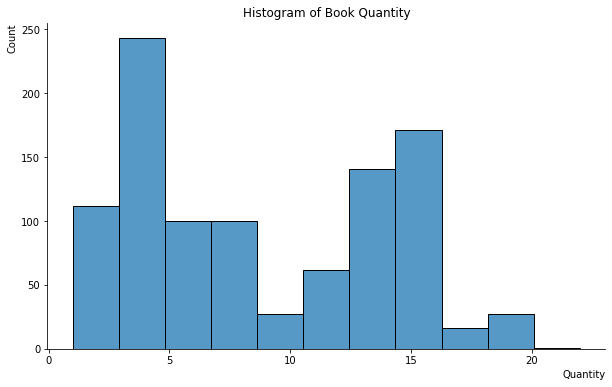

In [21]:
# load dataset
df = pd.read_csv('books_scraped.csv')

# create a GMM model with 2 components (one for each mode in our distribution)
gmm = GaussianMixture(n_components=2)
gmm.fit(df[['Quantity']])

# predict component for the feature
df['component'] = gmm.predict(df[['Quantity']])


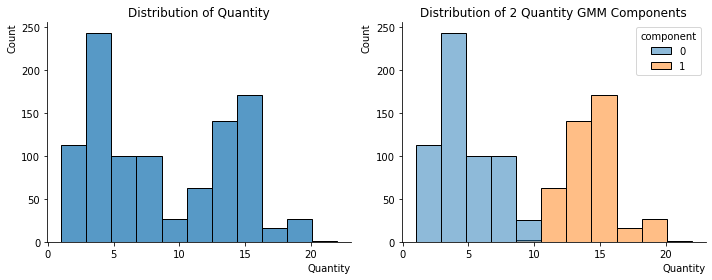

In [29]:
fig, (before, after) = plt.subplots(ncols=2, figsize=(10, 4))

# plot histogram for a feature of interest: Qunatity of books
sns.histplot(data=df, x='Quantity', ax=before)
sns.despine()
before.title.set_text("Distribution of Quantity")

# plot histogram, showing two components
sns.histplot(data=df, x='Quantity', hue='component', ax=after)
sns.despine()
after.title.set_text("Distribution of 2 Quantity GMM Components")

plt.tight_layout()
plt.show()

## 2. Unsupervised Classification

In [82]:
# https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

!kaggle datasets download -d parulpandey/palmer-archipelago-antarctica-penguin-data
!unzip palmer-archipelago-antarctica-penguin-data

  0%|                                               | 0.00/11.3k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 11.3k/11.3k [00:00<00:00, 8.04MB/s]
Archive:  palmer-archipelago-antarctica-penguin-data.zip
  inflating: penguins_lter.csv       
  inflating: penguins_size.csv       


In [30]:
# load the dataset
df = pd.read_csv('penguins_size.csv')

In [32]:
# some preprocessing and engineering
df = df[~df.isnull().any(axis=1)]

features = ['culmen_length_mm', 'culmen_depth_mm']


In [33]:
gmm = GaussianMixture(n_components=3)
gmm.fit(df[features])

df['component'] = gmm.predict(df[features]).astype('str')

In [34]:
df.groupby(['species', 'component'])['component'].count()

species    component
Adelie     1            142
           2              4
Chinstrap  1              5
           2             63
Gentoo     0            106
           2             14
Name: component, dtype: int64

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

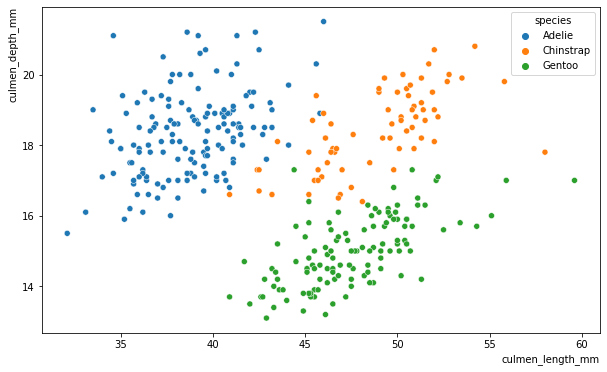

In [35]:
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm', hue='species')

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

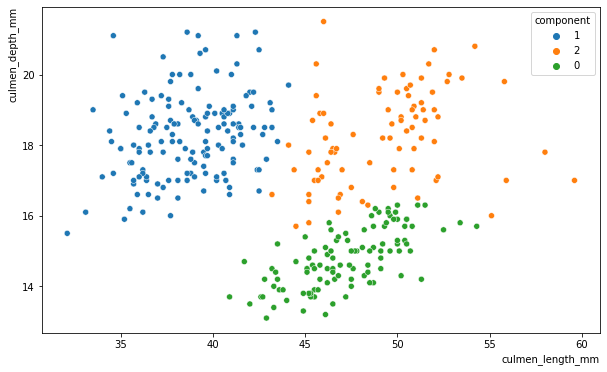

In [36]:
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm', hue='component')

In [39]:
df['proba_component_0'] = gmm.predict_proba(df[features])[:, 0]

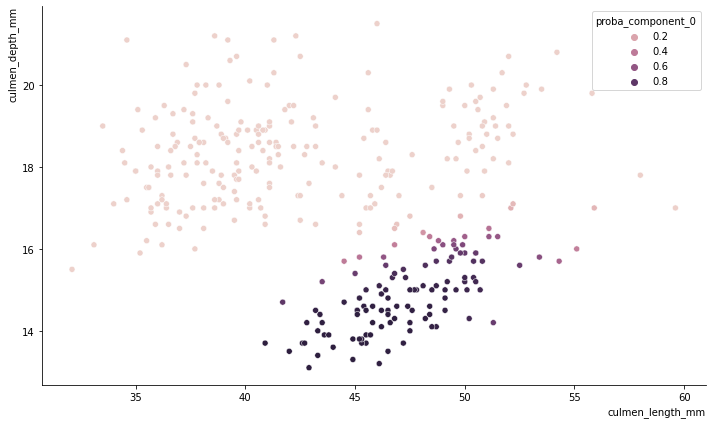

In [52]:
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm', hue='proba_component_0', legend='brief')
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm', hue='component')

## 3. Anomaly Detection

2 Variations:
1. Outliers resemble their own class or group
2. Outliers are sporadic

In [281]:
# Variation 1

In [259]:
from scipy import stats

In [620]:
from scipy.io import loadmat

# upload the datafile 
# http://odds.cs.stonybrook.edu/wine-dataset/
# Saket Sathe and Charu C. Aggarwal. LODES: Local Density meets Spectral Outlier Detection. SIAM Conference on Data Mining, 2016.
wine = loadmat('wine.mat')

# grab the features and create a dataframe
columns = ["alcohol", "malicacid", "ash", "alcalinity_of_ash", "magnesium",
          "total_phenols", "flavanoids", "nonflanoid_phenols", "proanthocyanins",
          "color_intensity", "hue", "0D280_0D315_of_diluted_wines", "proline"]

df = pd.DataFrame(wine["X"], columns=columns)

# anomaly targets
y_true = wine["y"].flatten()

In [621]:
df

,alcohol,malicacid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflanoid_phenols,proanthocyanins,color_intensity,hue,0D280_0D315_of_diluted_wines,proline
0,13.29,1.97,2.68,16.8,102.0,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270.0
1,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0
2,13.68,1.83,2.36,17.2,104.0,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990.0
3,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
4,14.22,1.70,2.30,16.3,118.0,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
125,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
126,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
127,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [622]:
y_true

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

In [623]:
features = columns

/Users/viyaleta/opt/anaconda3/envs/anomalies/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

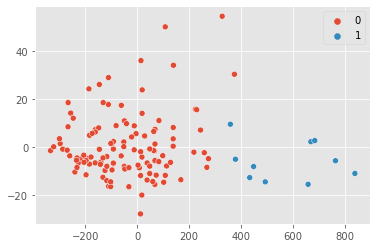

In [625]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df)
sns.scatterplot(pca_components[:,0], pca_components[:,1], hue=y_true)

In [665]:
gmm = GaussianMixture(n_components=2)
gmm.fit(df[features])

component = gmm.predict(df[features])
proba = gmm.predict_proba(df[features])

In [666]:
component

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [667]:
confusion_matrix(y_true, component)

array([[ 11, 108],
       [ 10,   0]])

/Users/viyaleta/opt/anaconda3/envs/anomalies/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

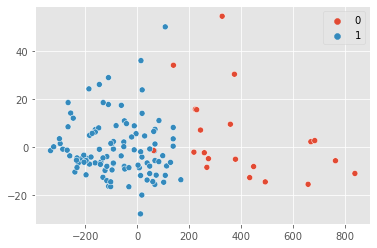

In [668]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df)
sns.scatterplot(pca_components[:,0], pca_components[:,1], hue=component)

/Users/viyaleta/opt/anaconda3/envs/anomalies/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/viyaleta/opt/anaconda3/envs/anomalies/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


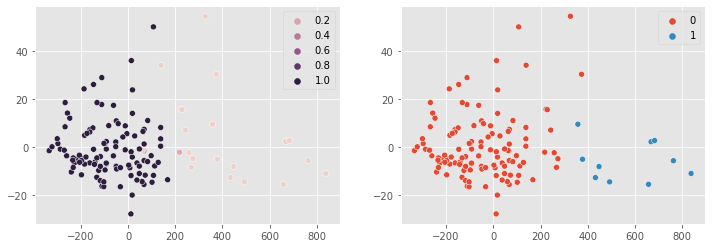

In [675]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.scatterplot(pca_components[:,0], pca_components[:,1], hue=proba[:, 1], ax=ax0)
sns.scatterplot(pca_components[:,0], pca_components[:,1], hue=y_true, ax=ax1)
plt.show()